In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import scipy.stats as stats
from scipy.stats import mannwhitneyu, spearmanr, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%load_ext autoreload
%autoreload 2
sys.path.append('../Utils')
from eda import AnaliseEDA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
eda = AnaliseEDA()

In [120]:
df = pd.read_csv("../Dados/insurance.csv")
df.head()#Mostrando as 5 primeiras linhas da tabela

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Aqui vemos que os dados estão nos tipos certos e que não apresentam missing velues, logo não irei me preocupar em tratar valores vazios! Agora irei analisar a distribução dos dados e como estão os seus quartis

In [122]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Após a analise das descrições dos dados, vemos que não há valores faltantes e não apresenta outlies significativos, mas vou fazer um plot para ver a distribuição dos dados e ver se estão normalizados ou se há dados irregulares, mas antes irei ver a descrição das variaveis categoricas.

In [123]:
df.select_dtypes(include="object").describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Após a análise, vemos que o sexo mais presente nos pacientes são os masculino, a maioria dos pacientes são fumentes e a região mais se destaca entre os pacientes são os do sudeste. Após a analise dos describe irei começar a analise unvariada das features.

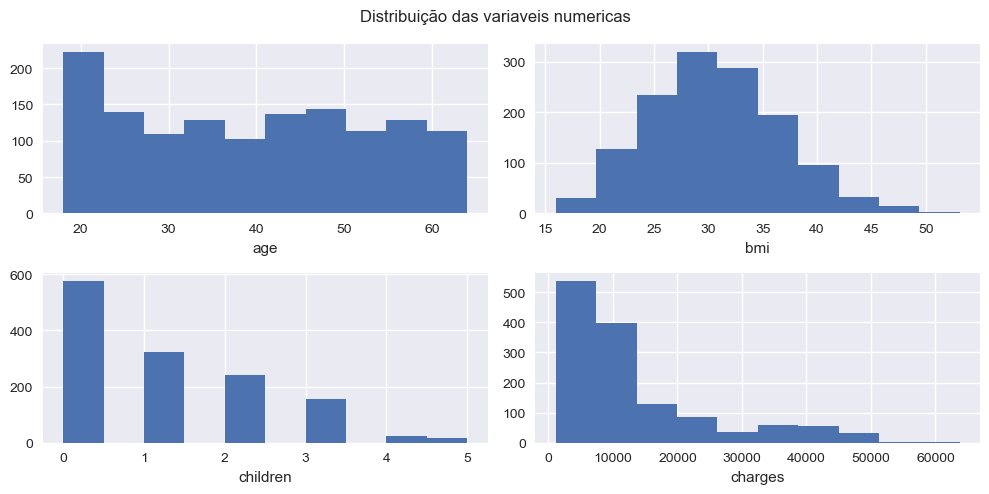

In [142]:
eda.analiseUnivariada(df, "number")



#### 📊 Análise Univariada(features nummericas)

* **Charges (Valor cobrado pelo seguro)***

A variável `charges` apresenta uma **distribuição assimétrica à direita**, indicando a presença de **outliers** — ou seja, alguns pacientes têm valores de cobrança bem mais altos que a maioria. Isso pode estar relacionado a fatores como idade avançada, tabagismo ou alto IMC.

* **Idade (`age`)***

A distribuição da idade mostra uma **concentração de pacientes entre 18 e 23 anos**. Após essa faixa, a quantidade de dados se mantém relativamente constante até os 60 anos, o que sugere uma **distribuição mais uniforme** nas demais faixas etárias.

* **IMC (`bmi`)***

A variável `bmi` possui uma **distribuição aproximadamente simétrica**, com maior concentração de valores em torno de **30**, indicando que muitos pacientes estão **próximos ou acima da faixa de sobrepeso**.

* **Número de filhos (`children`)**

A maior parte dos pacientes possui **0 filhos**. A frequência diminui gradualmente até 5 filhos, o que mostra que é **raro encontrar pacientes com muitos filhos**.
Vamos partir para analise univariadas mas das colunas categoricas.


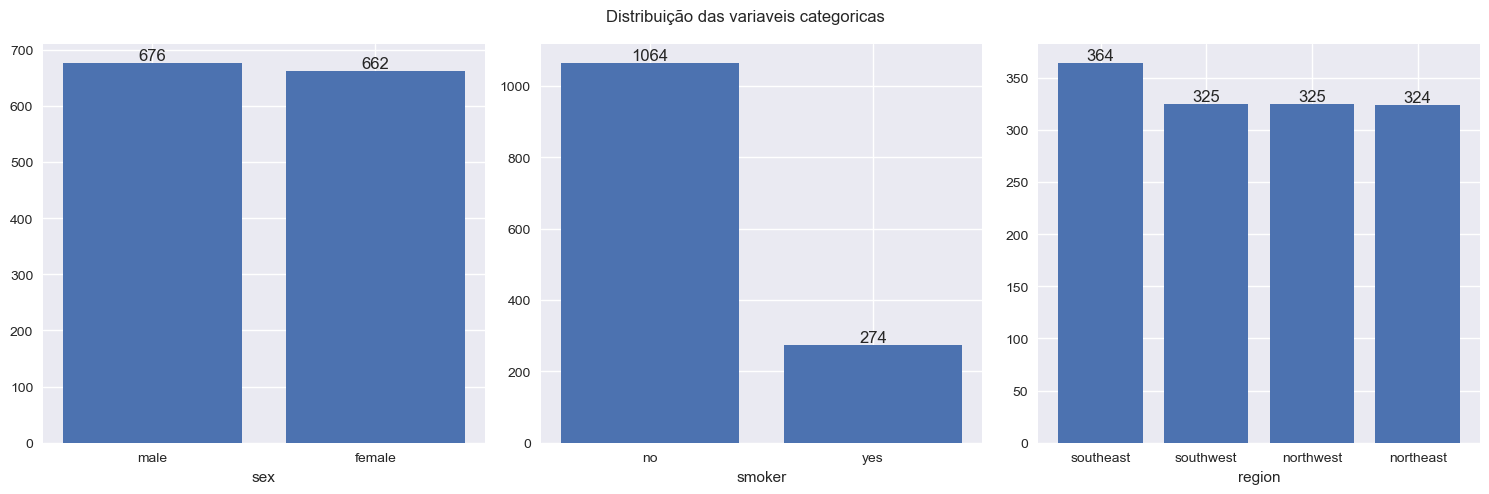

In [143]:
eda.analiseUnivariada(df, "object")



#### 📊 Análise Univariada das Variáveis Categóricas

* **Sexo:**
  A distribuição entre homens e mulheres é bastante equilibrada, com uma diferença mínima no número de pacientes.

* **Tabagismo:**
  A maioria dos pacientes (mais de 80%) são **não fumantes**, indicando que fumantes representam uma parcela menor da amostra.

* **Região:**
  A região **Southeast (Sudeste)** concentra a maior parte dos pacientes, enquanto as demais regiões apresentam ocorrências distribuídas de forma mais uniforme, mantendo proporções similares entre si.

  Agora vamos começar as análises bivariadas


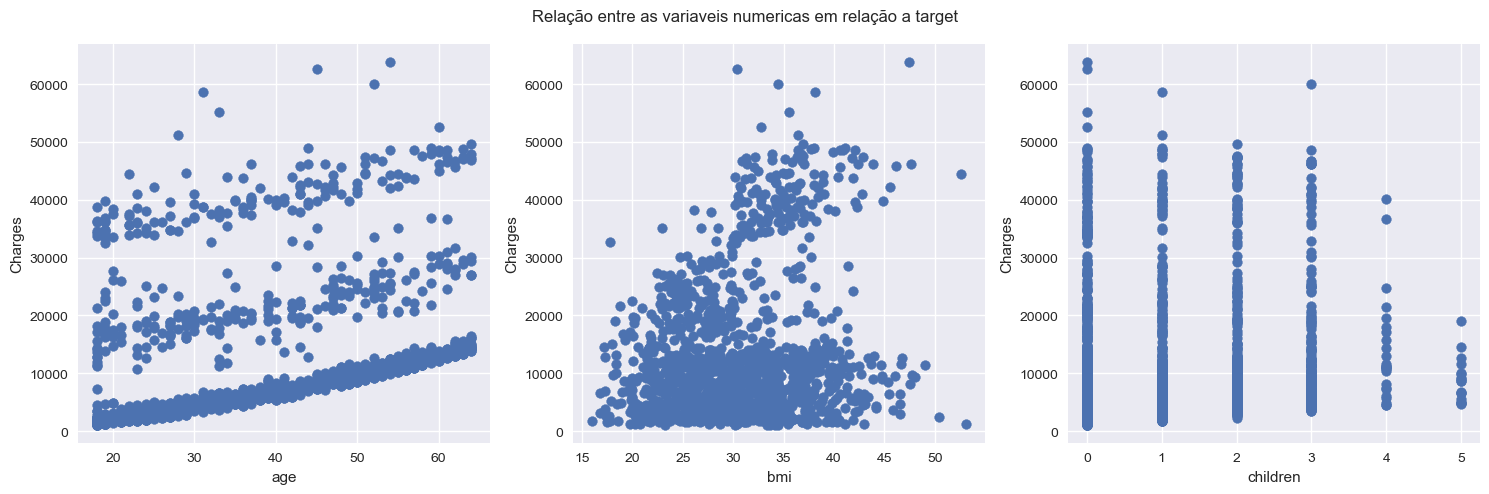

In [147]:
eda.analiseBivariada(df, "number")

#### Análise dos Fatores que Impactam nos Custos Médicos  

Ao analisar os gráficos, observa-se uma relação entre as variáveis demográficas e os custos médicos (*charges*), conforme destacado abaixo:  

* **1. Idade vs. Custos Médicos**  
Há uma tendência clara de que pacientes mais velhos tendem a apresentar custos médicos mais elevados. Esse padrão está alinhado com estudos na área de saúde, que indicam que o avanço da idade está associado a um maior risco de condições crônicas e, consequentemente, a maiores gastos com tratamentos.  

* **2. IMC (Índice de Massa Corporal) vs. Custos**  
Nota-se uma correlação positiva entre valores mais altos de IMC (especialmente acima de 35, classificados como obesidade grau II) e custos médicos elevados. Essa relação é consistente com pesquisas que associam obesidade a maiores riscos de doenças cardiovasculares, diabetes e outras comorbidades, resultando em maior utilização de serviços de saúde.  

* **3. Número de Dependentes (Filhos) vs. Custos**  
Pacientes com **0 a 3 dependentes** apresentam uma maior variação nos custos, incluindo valores mais altos. Já aqueles com **4 ou mais filhos** mostram custos relativamente menores, possivelmente devido ao menor número de observações nessa categoria (classes minoritárias), o que pode limitar a detecção de padrões mais robustos.  

Agora vamos analisar as variaveis categoricas


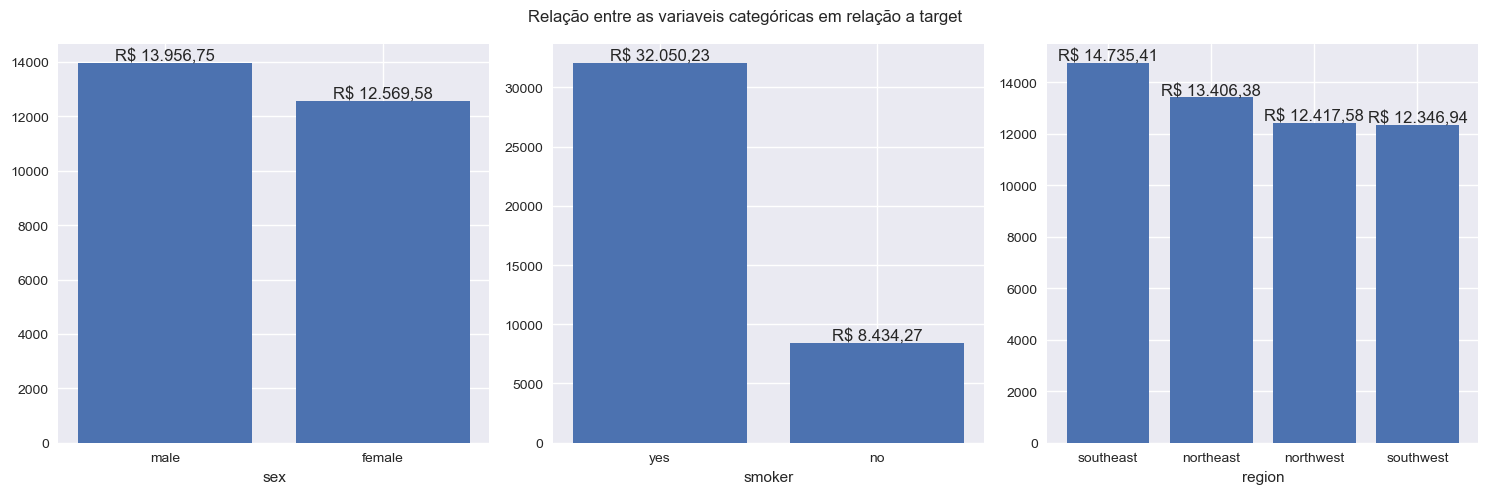

In [148]:
eda.analiseBivariada(df, "object")

#### Análise Bivariada: Relação entre Variáveis Categóricas e Custos Médicos  

A análise bivariada entre variáveis categóricas e os custos médicos (*charges*) revelou os seguintes padrões:  

* **1. Gênero (Sexo) vs. Custos**  
- Existe uma diferença **mínima** nos custos médicos entre homens e mulheres.  
- Isso sugere que o gênero, por si só, não é um fator determinante para variações significativas nos gastos com saúde.  

* **2. Hábito de Fumar vs. Custos**  
- Há uma **diferença drástica** nos custos entre fumantes e não fumantes.  
  - **Média de custos para fumantes:** R$ 32.050,23  
  - **Média de custos para não fumantes:** R$ 8.434,27  
- Essa disparidade indica que o tabagismo está fortemente associado a custos médicos **significativamente mais altos**, possivelmente devido a doenças relacionadas ao fumo, como problemas respiratórios e cardiovasculares.  

* **3. Região vs. Custos**  
- Indivíduos da região **Sudeste** apresentam os **maiores custos médicos** em comparação com outras regiões.  
- Esse resultado pode estar associado a:  
  - Maior prevalência de fumantes nessa região (a ser verificado na análise multivariada).  
  - Possíveis diferenças socioeconômicas ou acesso a serviços de saúde mais especializados (e caros).  

---  

#### **Conclusão da Análise Bivariada**  

Os principais insights obtidos foram:  
✅ **Fumantes têm custos médicos ~4x maiores** que não fumantes, reforçando o impacto negativo do tabagismo na saúde e nos gastos hospitalares.  
✅ **O gênero não apresenta influência relevante** nos custos, indicando que outras variáveis têm maior peso.  
✅ **A região Sudeste destaca-se com os maiores custos**, sugerindo a necessidade de uma investigação mais profunda (ex.: correlação com tabagismo, custo de vida ou qualidade dos serviços de saúde).  
✅ **Indice de massa corporal alto tende a ocasionar custos mais altos**, sugerindo que eles tendem a ter gastos maiores pela obesidade.  
✅ **Pessoas mais velhas tendem a ter mais gastos**, associado a um maior risco de condições crônicas e, consequentemente, a maiores gastos com tratamentos.

Esses resultados podem auxiliar em políticas de saúde pública e estratégias de precificação de seguros médicos, priorizando campanhas antitabagismo e análises regionais mais detalhadas. Agora vamos tentar provar com alguns testes de hipoteses.

In [153]:
# Verificar normalidade (Shapiro-Wilk)
print("Teste de Normalidade para Charges:")
print(stats.shapiro(df['charges']))

Teste de Normalidade para Charges:
ShapiroResult(statistic=0.8146881157362383, pvalue=1.1505226334932036e-36)


Como o valor deu maior que 0.05, logo não há uma distribuição normal(como já visto anteriormente), logo para utilizar meus testes, irei utilizar testes especificos como o Spearman

In [158]:
# 1. Correlações (Spearman para todas as variáveis, já que charges não é normal)
print("Correlações não-paramétricas (Spearman):")
print(f"Age vs. Charges: {spearmanr(df['age'], df['charges'])}")
print(f"BMI vs. Charges: {spearmanr(df['bmi'], df['charges'])}")

# 2. Diferença entre fumantes vs. não-fumantes (Mann-Whitney U)
print("\nDiferença entre fumantes e não-fumantes (Mann-Whitney U):")
print(mannwhitneyu(
    df[df['smoker'] == 'yes']['charges'],
    df[df['smoker'] == 'no']['charges']
))

# 3. Diferença entre regiões (Kruskal-Wallis + Dunn post-hoc)
print("\nDiferença entre regiões (Kruskal-Wallis):")
print(kruskal(
    *[df[df['region'] == reg]['charges'] for reg in df['region'].unique()]
))

Correlações não-paramétricas (Spearman):
Age vs. Charges: SignificanceResult(statistic=0.5343921337718459, pvalue=1.130692027803638e-99)
BMI vs. Charges: SignificanceResult(statistic=0.11939590358331145, pvalue=1.1926059544526874e-05)

Diferença entre fumantes e não-fumantes (Mann-Whitney U):
MannwhitneyuResult(statistic=284133.0, pvalue=5.270233444503571e-130)

Diferença entre regiões (Kruskal-Wallis):
KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)


Para avaliar a relação entre variáveis comportamentais e os custos médicos, utilizamos testes estatísticos não paramétricos, que não exigem pressupostos como normalidade dos dados.

#### Correlações não-paramétricas (Teste de Spearman)

* **Idade vs. Custos**:
  Correlação de **0,53** (*p* ≈ 1,13e-99), indicando uma **correlação positiva forte e altamente significativa**. Isso sugere que, quanto mais velha a pessoa, maiores são os custos médicos. Em média, pessoas mais velhas apresentam **custos \~53% mais altos** em relação à média geral.

* **IMC vs. Custos**:
  Correlação de **0,12** (*p* ≈ 1,19e-05), indicando uma **correlação fraca, mas estatisticamente significativa**. Ou seja, pessoas com maior índice de massa corporal tendem a ter **custos ligeiramente mais altos**, embora o impacto não seja tão expressivo quanto o da idade.

#### Diferença entre fumantes e não fumantes (Mann-Whitney U)

* Resultado: *p* ≈ 5,27e-130.
  Essa diferença é **altamente significativa**. Fumantes apresentam **custos médios cerca de 3,8 vezes maiores** que os não-fumantes (R\$ 32 mil contra R\$ 8,4 mil). Isso confirma que o tabagismo tem um impacto muito forte sobre os custos de saúde.

#### Diferença entre regiões (Kruskal-Wallis)

* Resultado: *p* ≈ 0,192.
  Como o valor de *p* é **maior que 0,05**, **não há evidências estatísticas** de que os custos médicos variem de forma significativa entre as diferentes regiões analisadas.

####  Conclusão

As análises mostram que **idade**, **IMC** (embora com efeito mais sutil) e **tabagismo** têm impacto estatisticamente significativo nos custos médicos. Em contrapartida, **a região geográfica não apresenta influência significativa** sobre esses custos. Agora irei partir para as anaalise multivariadas



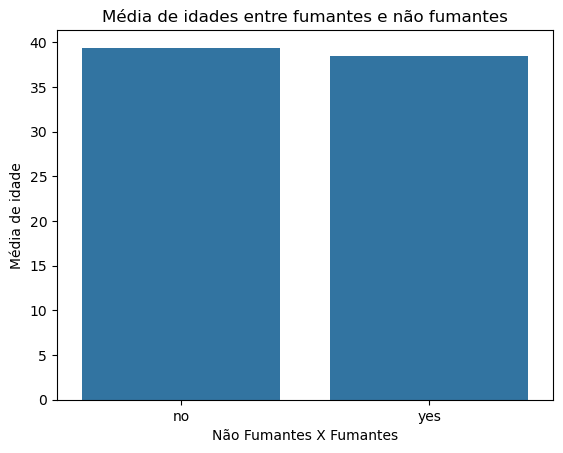

In [ ]:
mediaDeIdadeDeFumantesENaoFumantes = df[["smoker", "age"]].groupby("smoker").mean()
sns.barplot(mediaDeIdadeDeFumantesENaoFumantes, x="smoker", y="age")
plt.xlabel("Não Fumantes X Fumantes")
plt.ylabel("Média de idade")
plt.title("Média de idades entre fumantes e não fumantes")
plt.show()

Analisando o gráfico acima, não aparentar ter uma diferença grande, logo não há ua relação entre essas duas features! Vou analisar se existe entre a  a feature smoker e children

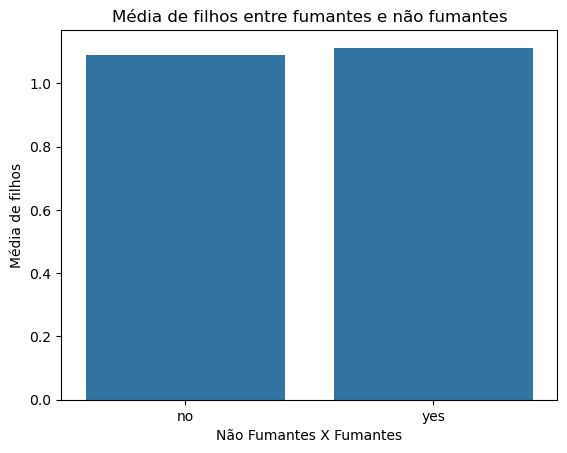

In [ ]:
mediaDeIdadeDeFumantesENaoFumantes = df[["smoker", "children"]].groupby("smoker").mean()
sns.barplot(mediaDeIdadeDeFumantesENaoFumantes, x="smoker", y="children")
plt.xlabel("Não Fumantes X Fumantes")
plt.ylabel("Média de filhos")
plt.title("Média de filhos entre fumantes e não fumantes")
plt.show()

O gráfico acima também não apresenta diferenças de média de filhos o que nos mostra que não há uma relação entre essas features. Agora vou começar o tratamento das variaveis categoricas para passar para construção do modelo preditivo!

In [ ]:
df_tratado = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)#Tranformando features categoricas em numericas

In [ ]:
df_tratado.head()

,age,bmi,children,charges,chargeLog,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734176,False,True,False,False,True
1,18,33.770,1,1725.55230,7.453302,True,False,False,True,False
2,28,33.000,3,4449.46200,8.400538,True,False,False,True,False
3,33,22.705,0,21984.47061,9.998092,True,False,True,False,False
4,32,28.880,0,3866.85520,8.260197,True,False,True,False,False


In [ ]:
df_tratado.to_csv("../Dados/Base de Dados Tratada (insurance).csv")